In [1]:
# data modules
import numpy as np
import scipy.stats as stats
import pandas as pd

# plotting modules
import matplotlib

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

import seaborn as sns
sns.set_style('whitegrid')

import plotly
plotly.offline.init_notebook_mode() 


# Stats/Regresions Packages
from sklearn import linear_model
from sklearn.metrics import mean_squared_error

# make sure charts appear in the notebook:
#%matplotlib notebook-----I would have loved to use this option but my PC is not bale to handle it.
%matplotlib inline
%config InlineBackend.figure_format ='retina'

In [2]:
bank = pd.read_excel('C:\\Users\\Shiv\\Desktop\\ECON628-01-spgunjal\\Project2\\Master.xlsx')

In [3]:
bank.describe()

,cert,docket,fed_rssd,rssdhcr,zip,offdom,offfor,stmult,specgrp,subchaps,...,idlncorr,depdastr,eqv,rbc1aaj,rbc1rwaj,rbcrwaj,asset5,ernast5,eq5,lnlsgr5
count,779047.000000,779047.000000,7.790470e+05,7.790470e+05,779047.000000,779047.000000,779047.000000,779047.000000,779047.000000,779047.000000,...,7.773720e+05,7.776320e+05,7.771800e+05,7.782520e+05,7.772930e+05,778039.000000,7.784340e+05,7.777810e+05,7.780980e+05,7.769770e+05
mean,20199.037075,5856.914945,8.812401e+05,1.199331e+06,52726.772109,10.363403,0.098599,0.058673,4.538124,0.204411,...,2.614488e+02,3.057443e+02,7.958726e+02,1.481865e+02,7.186538e+01,34.819964,2.338254e+05,2.043319e+05,3.673490e+05,5.155500e+05
std,15222.414627,7106.574420,8.885040e+05,1.040348e+06,23444.306673,97.713517,4.109900,0.235012,1.962416,0.403271,...,1.980907e+04,3.660010e+04,1.205268e+05,1.758225e+04,5.240278e+03,177.360095,4.503928e+06,3.700980e+06,1.051215e+07,1.110239e+07
min,8.000000,0.000000,0.000000e+00,0.000000e+00,625.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,-5.434783e+01,-1.230315e+01,-5.194690e+02,-3.887736e+03,-7.636462e+05,-1466.666667,-2.149533e+02,-5.848638e+01,-4.162760e+05,-2.300000e+03
25%,9122.000000,0.000000,3.116490e+05,0.000000e+00,35986.000000,1.000000,0.000000,0.000000,4.000000,0.000000,...,3.286875e+00,7.342002e+00,1.030985e+01,1.012546e+01,1.066520e+01,10.709895,1.091082e+01,1.142458e+01,2.233412e+01,4.034274e+01
50%,17195.000000,2338.000000,6.285520e+05,1.122543e+06,56007.000000,3.000000,0.000000,0.000000,4.000000,0.000000,...,6.250563e+01,7.827326e+01,5.341961e+01,6.400211e+01,1.603435e+01,15.627615,1.806553e+01,1.932570e+01,7.335000e+03,3.865900e+04
75%,28888.000000,11685.000000,9.311590e+05,1.866445e+06,69129.000000,6.000000,0.000000,0.000000,5.000000,0.000000,...,8.092672e+01,8.800619e+01,8.131413e+01,8.426690e+01,6.258476e+01,72.167321,5.336032e+04,4.889860e+04,5.602143e+04,1.176877e+05
max,91393.000000,99998.000000,4.845861e+06,5.041521e+06,99901.000000,6729.000000,283.000000,1.000000,9.000000,1.000000,...,7.623500e+06,2.119370e+07,6.268745e+07,5.049231e+06,2.241452e+06,58891.071429,5.984123e+08,4.943888e+08,1.468623e+09,1.717203e+09


In [4]:
print bank.shape
print bank.info()

(779047, 70)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 779047 entries, 0 to 779046
Data columns (total 70 columns):
cert               779047 non-null int64
docket             779047 non-null int64
fed_rssd           779047 non-null int64
rssdhcr            779047 non-null int64
name               779047 non-null object
city               779047 non-null object
stalp              779047 non-null object
zip                779047 non-null int64
repdte             779047 non-null datetime64[ns]
rundate            779047 non-null datetime64[ns]
bkclass            779047 non-null object
address            779002 non-null object
namehcr            545202 non-null object
offdom             779047 non-null int64
offfor             779047 non-null int64
stmult             779047 non-null int64
specgrp            779047 non-null int64
subchaps           779047 non-null int64
county             779047 non-null object
cbsa_metro         442021 non-null float64
cbsa_metro_name    442021 non

In [5]:
#dropping columns which are not required for the analysis
bank.drop([
        'docket',
        'rssdhcr',
        'rundate',
        'subchaps',
        'cbsa_metro',
        'cbsa_metro_name',
        'estymd',
        'effdate',
        'mutual',
        'parcert',
        'trust',
        'regagnt',
        'insagnt1',
        'fdicdbs',
        'fdicsupv',
        'fldoff',
        'fed',
        'occdist',
        'otsregnm',
        'webaddr',
        'idntilr',
        'idntigr'
        

    ], axis = 1, inplace=True)

In [6]:
print bank.shape
print bank.info()

(779047, 48)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 779047 entries, 0 to 779046
Data columns (total 48 columns):
cert        779047 non-null int64
fed_rssd    779047 non-null int64
name        779047 non-null object
city        779047 non-null object
stalp       779047 non-null object
zip         779047 non-null int64
repdte      779047 non-null datetime64[ns]
bkclass     779047 non-null object
address     779002 non-null object
namehcr     545202 non-null object
offdom      779047 non-null int64
offfor      779047 non-null int64
stmult      779047 non-null int64
specgrp     779047 non-null int64
county      779047 non-null object
insdate     779047 non-null datetime64[ns]
intincy     312015 non-null float64
intexpy     312015 non-null float64
nimy        777740 non-null float64
noniiay     777744 non-null float64
nonixay     777744 non-null float64
noijy       777787 non-null float64
roa         777787 non-null float64
roaptx      777787 non-null float64
roe         777787 

In [7]:
#before cleaning the columns I am renaming the columns so that it becomes easy to call spesific columns as an 
#when required
bank.rename(columns={
    'fed_rssd' : 'fed_code',
    'stalp' : 'state_id',
    'zip' : 'zip_code',
    'repdte' : 'date',
    'bkclass' : 'bank_type',
    'namehcr' : 'name_holding_company',
    'offdom' : 'no_domestic_branches',
    'offfor' : 'no_foreign_branches',
    'stmult' : 'interstate_branches',
    'specgrp' : 'asset_concentration_hierarchy',
    'insdate' : 'date_of_deposite_insurance',
    'intincy' : 'yield_on_earning_assets',
    'intexpy' : 'cost_of_funding_earning_assets',
    'nimy' : 'net_interest_margin',
    'noniiay' : 'noninterest_income_to_avg_assets',
    'nonixay' : 'noninterest_expense_to_avg_assets',
    'noijy' : 'net_operating_income_to_assets',
    'roaptx' : 'pretax_roa',
    'roeinjr' : 'retained_earnings_to_avg_equity',
    'ntlnlsr' : 'net_charge_offs_to_loans',
    'elnantr' : 'credit_loss_provision_to_net_charge_offs',
    'iderncvr' : 'earnings_coverage_of_net_charge_offs',
    'eeffr' : 'efficiency_ratio',
    'astempm' : 'assets_per_employee_millions',
    'iddivnir' : 'cash_dividends_to_net_income',
    'lnatresr' : 'loss_allowance_to_loans',
    'lnresncr' : 'loan_loss_allowance_to_noncurrent_loans',
    'nperfv' : 'noncurrent_assets+other_real_estate_owned_to_assets',
    'nclnlsr' : 'noncurrent_loans_to_loans',
    'lnlsntv' : 'net_loans_and_leases_to_total_assets',
    'lnlsdepr' : 'net_loans_and_leases_to_deposits',
    'idlncorr' : 'net_loans_and_leases_to_core_deposits',
    'depdastr' : 'total_domestic_deposits_to_total_assets',
    'eqv' : 'equity_capital_to_assets',
    'rbc1aaj' : 'corecapital_leverage_ratio',
    'rbc1rwaj' : 't1_risk_based_capital_ratio',
    'rbcrwaj' : 'total_risk_based_capital_ratio',
    'asset5' : 'avg_total_assets',
    'ernast5' : 'avg_earning_assets',
    'eq5' : 'avg_equity',
    'lnlsgr5' : 'avg_total_loans'

    }, inplace=True)

In [8]:
bank.drop([
        'name_holding_company',
        'address',
        'date_of_deposite_insurance',
        'fed_code'
        

    ], axis = 1, inplace=True)

In [9]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 779047 entries, 0 to 779046
Data columns (total 44 columns):
cert                                                   779047 non-null int64
name                                                   779047 non-null object
city                                                   779047 non-null object
state_id                                               779047 non-null object
zip_code                                               779047 non-null int64
date                                                   779047 non-null datetime64[ns]
bank_type                                              779047 non-null object
no_domestic_branches                                   779047 non-null int64
no_foreign_branches                                    779047 non-null int64
interstate_branches                                    779047 non-null int64
asset_concentration_hierarchy                          779047 non-null int64
county                       

In [10]:
import pickle

In [11]:
pwd

u'C:\\Users\\Shiv\\Desktop\\ECON628-01-spgunjal\\Project2'

In [12]:
bank.to_pickle('C:\\Users\\Shiv\\Desktop\\ECON628-01-spgunjal\\Project2\\bank_data.pkl') 

In [13]:
df = pd.read_pickle('C:\\Users\\Shiv\\Desktop\\ECON628-01-spgunjal\\Project2\\bank_data.pkl')

In [14]:
df.describe()

,cert,zip_code,no_domestic_branches,no_foreign_branches,interstate_branches,asset_concentration_hierarchy,yield_on_earning_assets,cost_of_funding_earning_assets,net_interest_margin,noninterest_income_to_avg_assets,...,net_loans_and_leases_to_core_deposits,total_domestic_deposits_to_total_assets,equity_capital_to_assets,corecapital_leverage_ratio,t1_risk_based_capital_ratio,total_risk_based_capital_ratio,avg_total_assets,avg_earning_assets,avg_equity,avg_total_loans
count,779047.000000,779047.000000,779047.000000,779047.000000,779047.000000,779047.000000,312015.000000,312015.000000,777740.000000,777744.000000,...,7.773720e+05,7.776320e+05,7.771800e+05,7.782520e+05,7.772930e+05,778039.000000,7.784340e+05,7.777810e+05,7.780980e+05,7.769770e+05
mean,20199.037075,52726.772109,10.363403,0.098599,0.058673,4.538124,8.070620,3.708509,5.039476,1.575002,...,2.614488e+02,3.057443e+02,7.958726e+02,1.481865e+02,7.186538e+01,34.819964,2.338254e+05,2.043319e+05,3.673490e+05,5.155500e+05
std,15222.414627,23444.306673,97.713517,4.109900,0.235012,1.962416,1.864034,4.159742,3.013270,11.640134,...,1.980907e+04,3.660010e+04,1.205268e+05,1.758225e+04,5.240278e+03,177.360095,4.503928e+06,3.700980e+06,1.051215e+07,1.110239e+07
min,8.000000,625.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,-1235.400662,-69.672986,...,-5.434783e+01,-1.230315e+01,-5.194690e+02,-3.887736e+03,-7.636462e+05,-1466.666667,-2.149533e+02,-5.848638e+01,-4.162760e+05,-2.300000e+03
25%,9122.000000,35986.000000,1.000000,0.000000,0.000000,4.000000,7.510102,3.268952,4.074895,0.503014,...,3.286875e+00,7.342002e+00,1.030985e+01,1.012546e+01,1.066520e+01,10.709895,1.091082e+01,1.142458e+01,2.233412e+01,4.034274e+01
50%,17195.000000,56007.000000,3.000000,0.000000,0.000000,4.000000,8.022034,3.739537,4.882659,0.953058,...,6.250563e+01,7.827326e+01,5.341961e+01,6.400211e+01,1.603435e+01,15.627615,1.806553e+01,1.932570e+01,7.335000e+03,3.865900e+04
75%,28888.000000,69129.000000,6.000000,0.000000,0.000000,5.000000,8.563832,4.178672,5.912969,1.894289,...,8.092672e+01,8.800619e+01,8.131413e+01,8.426690e+01,6.258476e+01,72.167321,5.336032e+04,4.889860e+04,5.602143e+04,1.176877e+05
max,91393.000000,99901.000000,6729.000000,283.000000,1.000000,9.000000,587.072243,1237.482564,122.647748,1880.000000,...,7.623500e+06,2.119370e+07,6.268745e+07,5.049231e+06,2.241452e+06,58891.071429,5.984123e+08,4.943888e+08,1.468623e+09,1.717203e+09


In [15]:
#checking for missing values
df.isnull().sum()

cert                                                        0
name                                                        0
city                                                        0
state_id                                                    0
zip_code                                                    0
date                                                        0
bank_type                                                   0
no_domestic_branches                                        0
no_foreign_branches                                         0
interstate_branches                                         0
asset_concentration_hierarchy                               0
county                                                      0
yield_on_earning_assets                                467032
cost_of_funding_earning_assets                         467032
net_interest_margin                                      1307
noninterest_income_to_avg_assets                         1303
noninter

In [ ]:
def replace_ingroup_mean(data,col):
    
    data['col'] = data.groupby(level=0)['col'].transform( lambda x: x.fillna(x.mean()))
    

In [16]:
df1 = df.set_index(['cert'])

In [17]:
df1.head(5)

,name,city,state_id,zip_code,date,bank_type,no_domestic_branches,no_foreign_branches,interstate_branches,asset_concentration_hierarchy,...,net_loans_and_leases_to_core_deposits,total_domestic_deposits_to_total_assets,equity_capital_to_assets,corecapital_leverage_ratio,t1_risk_based_capital_ratio,total_risk_based_capital_ratio,avg_total_assets,avg_earning_assets,avg_equity,avg_total_loans
cert,,,,,,,,,,,,,,,,,,,,,
15448,1st American State Bank of Minnesota,Hancock,MN,56244,1995-03-31,NM,2,0,0,2,...,70.097548,88.892113,9.693100,10.503145,14.788740,15.851404,13625.0,12500.5,1378.5,8140.0
23309,1st Bank,West Branch,MI,48661,1995-03-31,NM,7,0,0,4,...,95.381066,91.274783,6.854954,6.496904,9.199507,10.456037,85254.5,78699.5,5811.5,66411.5
16419,1st Bank & Trust,Broken Bow,OK,74728,1995-03-31,NM,3,0,0,8,...,85.805304,90.995799,8.241167,8.379969,12.762535,14.015484,48797.0,44047.0,3997.5,34831.5
4788,1st Bank of Troy,Troy,KS,66087,1995-03-31,NM,1,0,0,2,...,36.333270,85.730448,12.918965,13.087133,41.118830,42.388263,14293.5,13638.5,1760.0,3917.5
23406,1st Business Bank,Los Angeles,CA,90071,1995-03-31,NM,5,0,0,4,...,50.069500,88.008646,7.110299,7.344007,14.350122,15.608120,868899.5,792399.5,61855.0,322088.0


In [21]:
#replacing missing values by mean of the group
df1['yield_on_earning_assets'] = df1.groupby(level=0)['yield_on_earning_assets'].transform( lambda x: x.fillna(x.mean()))
df1['cost_of_funding_earning_assets'] = df1.groupby(level=0)['cost_of_funding_earning_assets'].transform( lambda x: x.fillna(x.mean()))
df1['credit_loss_provision_to_net_charge_offs'] = df1.groupby(level=0)['credit_loss_provision_to_net_charge_offs'].transform( lambda x: x.fillna(x.mean()))
df1['earnings_coverage_of_net_charge_offs'] = df1.groupby(level=0)['earnings_coverage_of_net_charge_offs'].transform( lambda x: x.fillna(x.mean()))
df1['efficiency_ratio'] = df1.groupby(level=0)['efficiency_ratio'].transform( lambda x: x.fillna(x.mean()))
df1['assets_per_employee_millions'] = df1.groupby(level=0)['assets_per_employee_millions'].transform( lambda x: x.fillna(x.mean()))
df1['loan_loss_allowance_to_noncurrent_loans'] = df1.groupby(level=0)['loan_loss_allowance_to_noncurrent_loans'].transform( lambda x: x.fillna(x.mean()))
df1['noncurrent_loans_to_loans'] = df1.groupby(level=0)['noncurrent_loans_to_loans'].transform( lambda x: x.fillna(x.mean()))
df1['net_loans_and_leases_to_total_assets'] = df1.groupby(level=0)['net_loans_and_leases_to_total_assets'].transform( lambda x: x.fillna(x.mean()))
df1['net_loans_and_leases_to_deposits'] = df1.groupby(level=0)['net_loans_and_leases_to_deposits'].transform( lambda x: x.fillna(x.mean()))
df1['cash_dividends_to_net_income'] = df1.groupby(level=0)['cash_dividends_to_net_income'].transform( lambda x: x.fillna(x.mean()))
df1['roa'] = df1.groupby(level=0)['roa'].transform( lambda x: x.fillna(x.mean()))
df1['roe'] = df1.groupby(level=0)['roe'].transform( lambda x: x.fillna(x.mean()))
df1['corecapital_leverage_ratio'] = df1.groupby(level=0)['corecapital_leverage_ratio'].transform( lambda x: x.fillna(x.mean()))
df1['total_risk_based_capital_ratio'] = df1.groupby(level=0)['total_risk_based_capital_ratio'].transform( lambda x: x.fillna(x.mean()))
df1['avg_total_assets'] = df1.groupby(level=0)['avg_total_assets'].transform( lambda x: x.fillna(x.mean()))
df1['avg_earning_assets'] = df1.groupby(level=0)['avg_earning_assets'].transform( lambda x: x.fillna(x.mean()))
df1['avg_equity'] = df1.groupby(level=0)['avg_equity'].transform( lambda x: x.fillna(x.mean()))
df1['avg_total_loans'] = df1.groupby(level=0)['avg_total_loans'].transform( lambda x: x.fillna(x.mean()))
df1['loss_allowance_to_loans'] = df1.groupby(level=0)['loss_allowance_to_loans'].transform( lambda x: x.fillna(x.mean()))


In [22]:
#checking for missing values
df1.isnull().sum()

name                                                       0
city                                                       0
state_id                                                   0
zip_code                                                   0
date                                                       0
bank_type                                                  0
no_domestic_branches                                       0
no_foreign_branches                                        0
interstate_branches                                        0
asset_concentration_hierarchy                              0
county                                                     0
yield_on_earning_assets                                38152
cost_of_funding_earning_assets                         38152
net_interest_margin                                     1307
noninterest_income_to_avg_assets                        1303
noninterest_expense_to_avg_assets                       1303
net_operating_income_to_

In [23]:
df1.dropna(axis=0, inplace=True)
df1.isnull().sum()

name                                                   0
city                                                   0
state_id                                               0
zip_code                                               0
date                                                   0
bank_type                                              0
no_domestic_branches                                   0
no_foreign_branches                                    0
interstate_branches                                    0
asset_concentration_hierarchy                          0
county                                                 0
yield_on_earning_assets                                0
cost_of_funding_earning_assets                         0
net_interest_margin                                    0
noninterest_income_to_avg_assets                       0
noninterest_expense_to_avg_assets                      0
net_operating_income_to_assets                         0
roa                            

In [25]:
print df1.shape
print df1.info()

(733735, 43)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 733735 entries, 15448 to 2270
Data columns (total 43 columns):
name                                                   733735 non-null object
city                                                   733735 non-null object
state_id                                               733735 non-null object
zip_code                                               733735 non-null int64
date                                                   733735 non-null datetime64[ns]
bank_type                                              733735 non-null object
no_domestic_branches                                   733735 non-null int64
no_foreign_branches                                    733735 non-null int64
interstate_branches                                    733735 non-null int64
asset_concentration_hierarchy                          733735 non-null int64
county                                                 733735 non-null object
yield_on_earn

In [26]:
#Def Ref: CART lecture
def dist_plotter(title, data, color):
    ''' here we set the canvas'''
    sns.set(rc={"figure.figsize": (10, 7)})
    sns.set_style('white')
    
    '''here we set the components of the graph'''
    dist = sns.distplot(data, hist_kws={'alpha':0.6}, kde_kws={'linewidth':2}, color = color)
    
    '''here we define the mean and the components for the mean line'''
    dist.axvline(np.mean(data), lw=3, c='darkred', ls='--')
    average_roll = '{0:.2f}'.format(np.mean(data))
    
    '''here we add the title'''
    title = 'Distribution of ' + title + '; average = '  + average_roll + '\n'
    dist.set_title(title, fontsize=16)
    
    dist = sns.distplot(data, hist_kws={'alpha':0.2}, kde_kws={'linewidth':2})


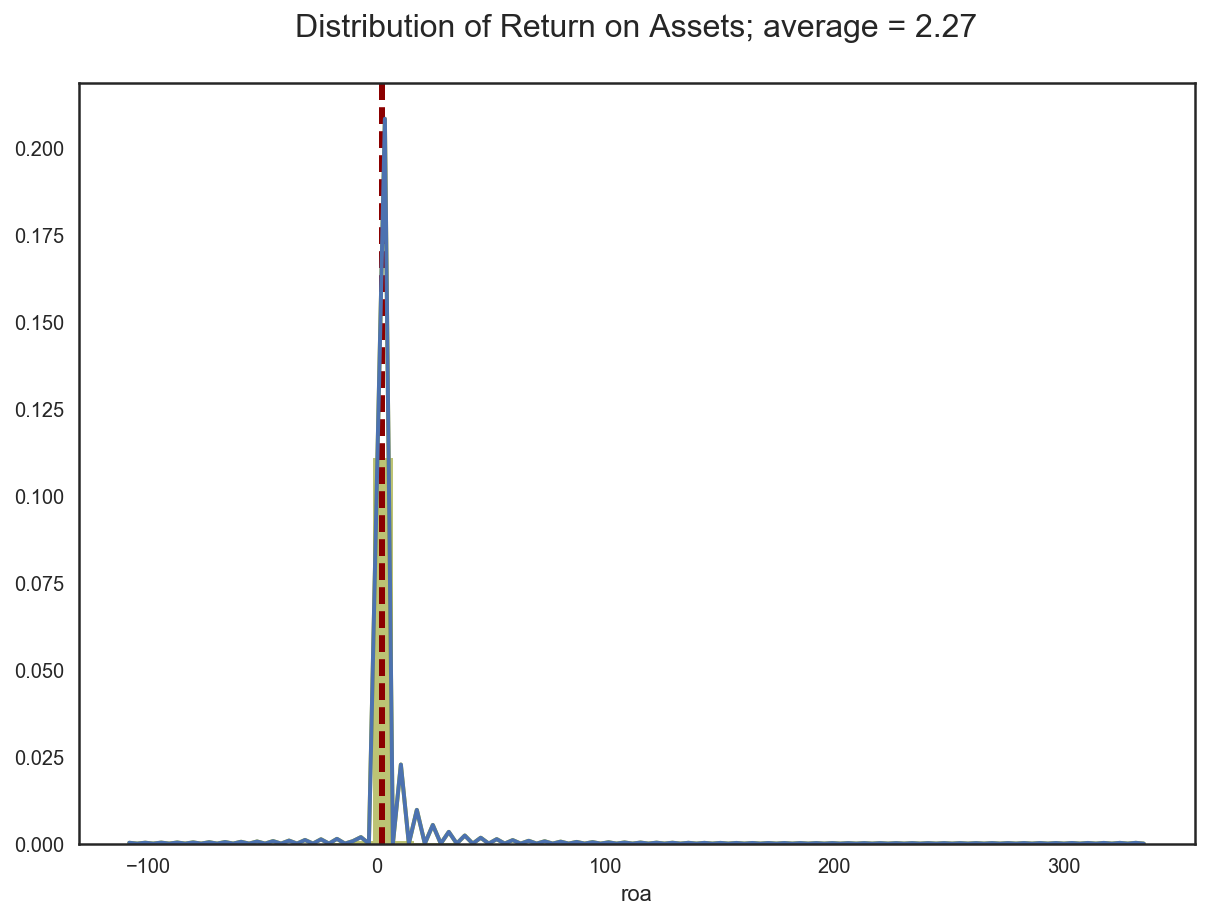

In [27]:
dist_plotter("Return on Assets", df1.roa, 'y')

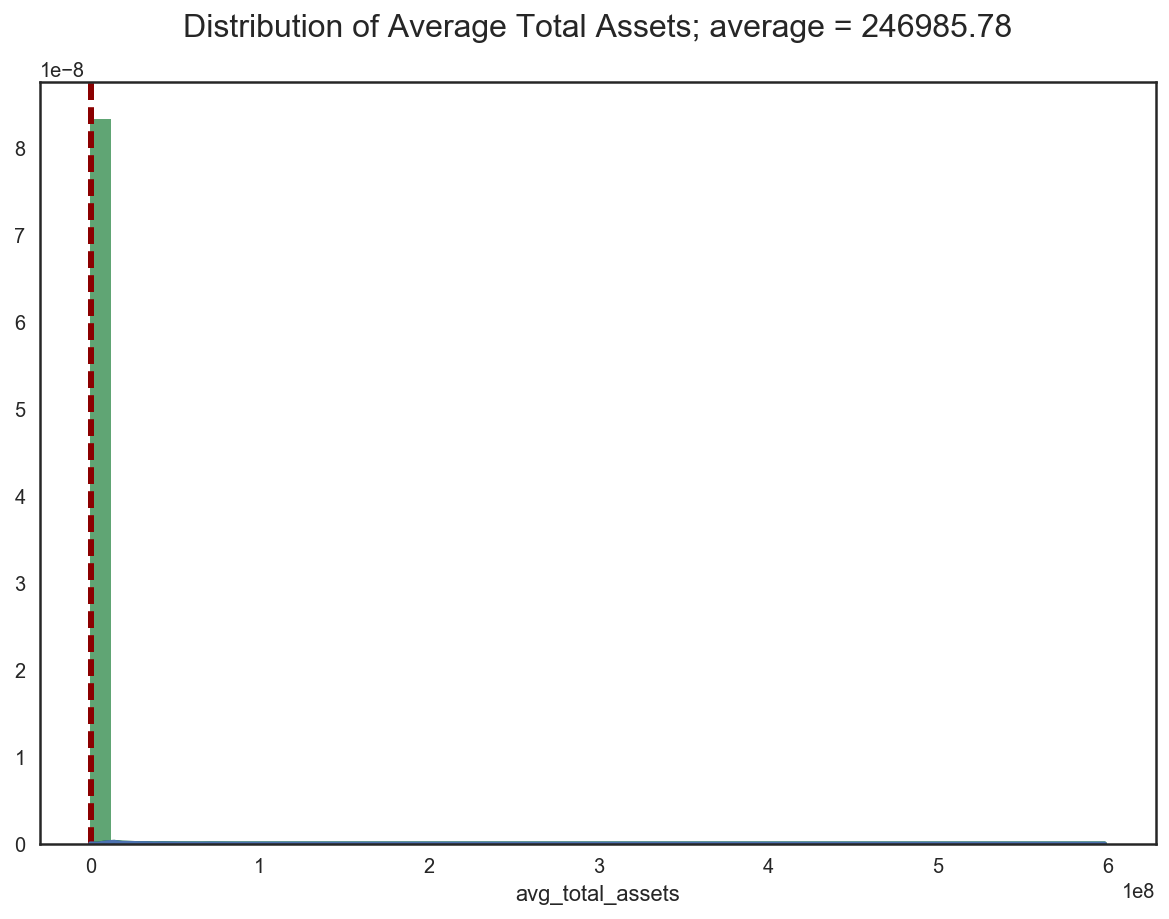

In [28]:
dist_plotter("Average Total Assets", df1.avg_total_assets, 'g')

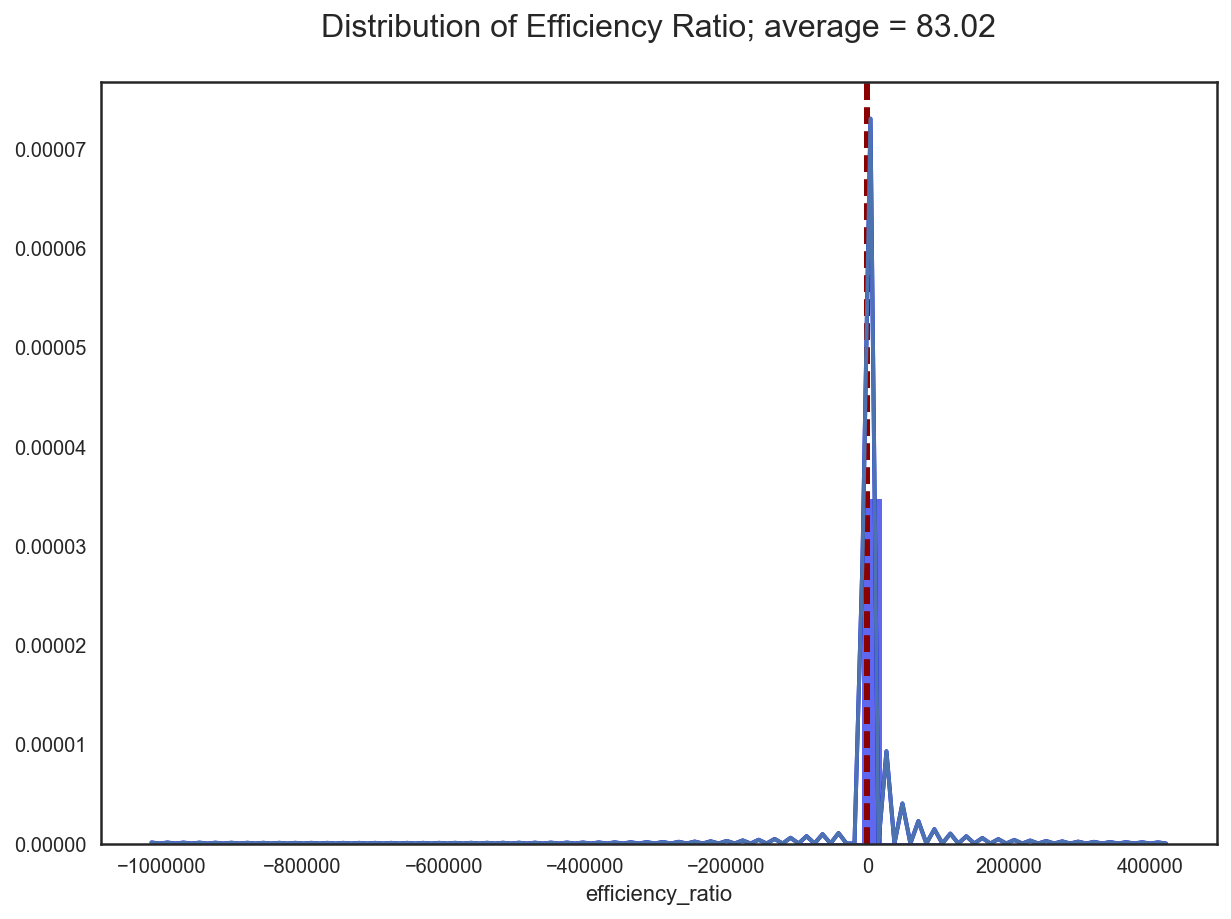

In [29]:
dist_plotter("Efficiency Ratio", df1.efficiency_ratio, 'b')

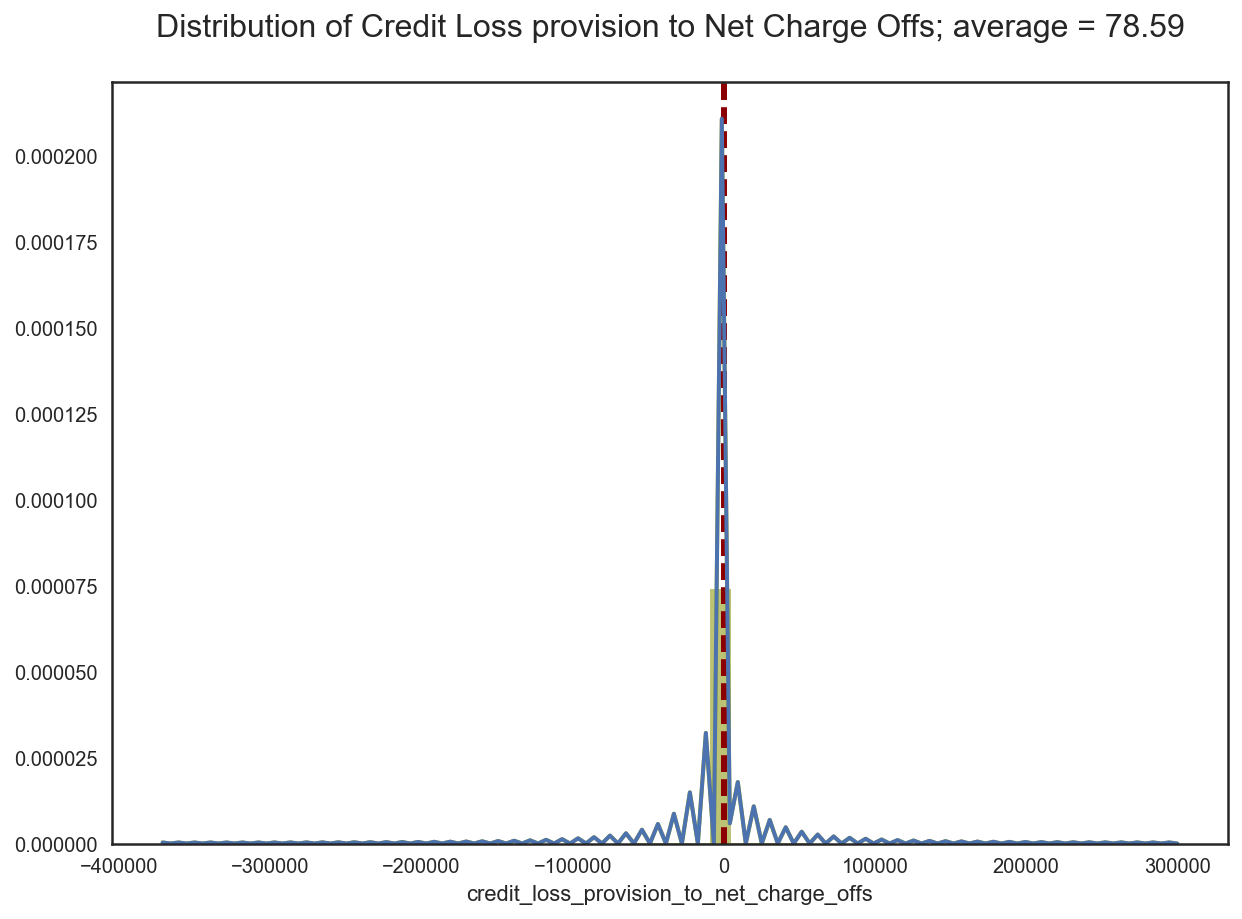

In [30]:
dist_plotter("Credit Loss provision to Net Charge Offs", df1.credit_loss_provision_to_net_charge_offs, 'y')

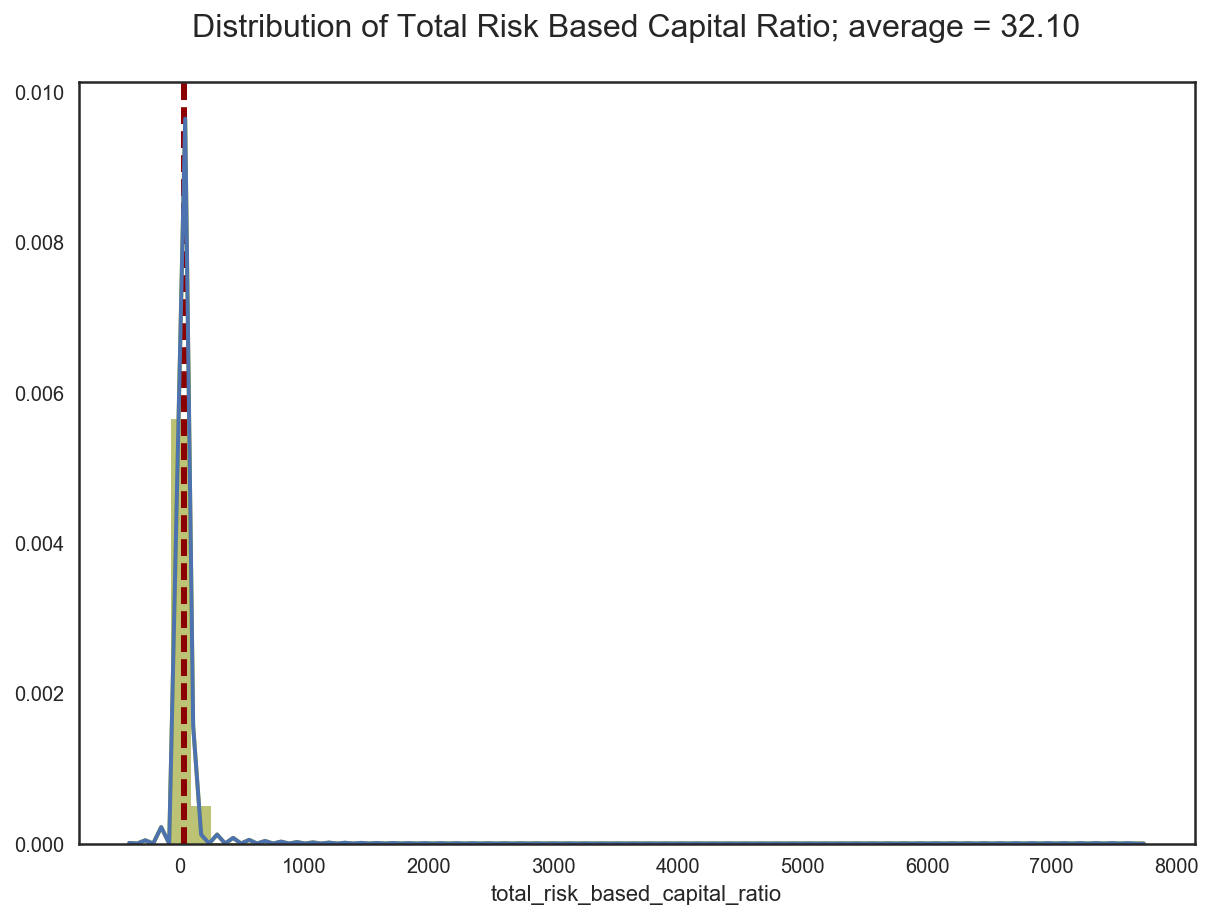

In [31]:
dist_plotter("Total Risk Based Capital Ratio", df1.total_risk_based_capital_ratio, 'y')

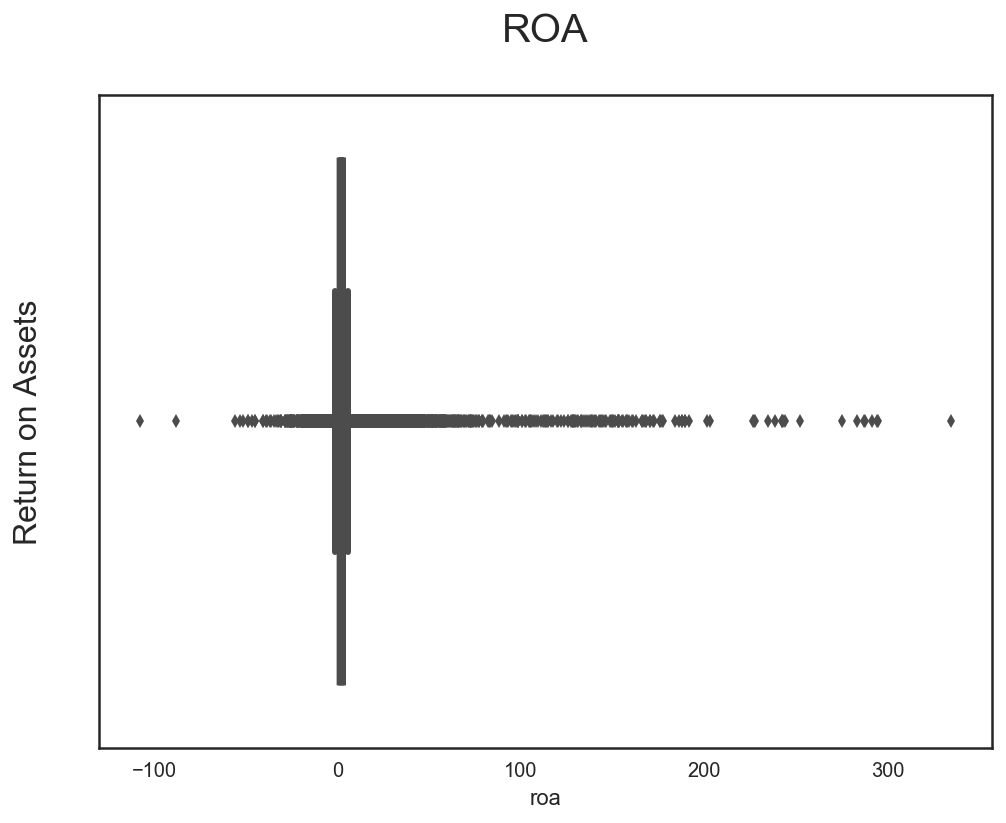

In [32]:
fig = plt.figure(figsize=(8,6))
ax = fig.gca()

sns.boxplot(df1.roa, orient='h',
            fliersize=5, linewidth=3, notch=True, 
            saturation=0.5, ax=ax)

ax.set_ylabel('Return on Assets\n', fontsize=16)
ax.set_title('ROA\n', fontsize=20)

plt.show()

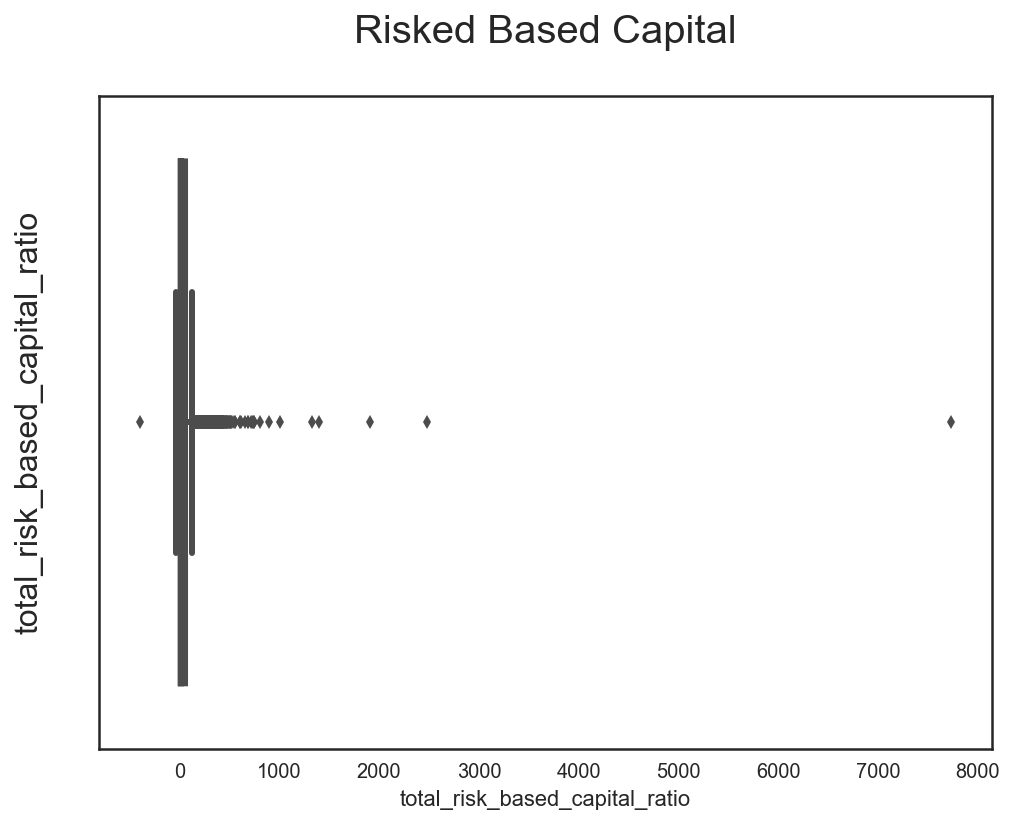

In [34]:
fig = plt.figure(figsize=(8,6))
ax = fig.gca()

sns.boxplot(df1.total_risk_based_capital_ratio, orient='h',
            fliersize=5, linewidth=3, notch=True, 
            saturation=0.5, ax=ax)

ax.set_ylabel('total_risk_based_capital_ratio\n', fontsize=16)
ax.set_title('Risked Based Capital\n', fontsize=20)

plt.show()
